<a href="https://colab.research.google.com/github/Sela80/s/blob/main/Ensemble_de_donn%C3%A9es_sur_la_criminalit%C3%A9_et_la_s%C3%A9curit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# À propos de l'ensemble de données
Cet ensemble de données contient 1 000 rapports de crimes détaillés recueillis au cours des deux dernières années en zone urbaine. Chaque enregistrement comprend le type de crime, les coordonnées précises du lieu, la date et l'heure de l'incident, des informations sur le quartier et des données démographiques sur la victime, telles que l'âge, le sexe et l'origine ethnique. Des champs supplémentaires permettent de savoir si une arme était utilisée et si le crime a été signalé à la police. Ces données sont idéales pour élaborer des modèles **prédictifs afin d'identifier les foyers de criminalité**, d'améliorer les alertes de sécurité publique et de soutenir les efforts de police de proximité.

# Objectif principal:
- Identifier les types de crimes les plus probables selon les caractéristiques démographiques

* Identifier le type de crime dans un quartier donné à une date et heure précises

* Identifions le genre , Groupe racial ou ethnique et Âge de la victime au moment de l’incident

# 1 - Analyse exploratoire

In [1]:
#Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shamimhasan8/crime-and-safety-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kouakougdonsela
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shamimhasan8/crime-and-safety-dataset


100%|██████████| 19.4k/19.4k [00:00<00:00, 48.9MB/s]

In [4]:
# Charger les données
df = pd.read_csv('/content/crime-and-safety-dataset/crime_safety_dataset.csv')

In [5]:
# Afficher notre Dataset
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [6]:
#Informations sur databases
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


On constate que 80% de nos données sont **Object**(	date,time,crime_type,	city,	state,	location_description,	victim_gender,	victim_race) et 20% **Int64**(id,victim_age)

In [7]:
# Vérifier les valeurs manquantes
df.isna().sum()

,0
id,0
date,0
time,0
crime_type,0
city,0
state,0
location_description,0
victim_age,0
victim_gender,0
victim_race,0


Pas de valeurs nulles

In [8]:
df.duplicated().sum()

np.int64(0)

Pas valeurs doublantes

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
victim_age,1000.0,52.201,22.913831,12.0,33.00,53.0,72.00,90.0


Ce rapport statistique nous laisse savoir que la victime le pus âgé est de 90 ans, moins âgé 12 ans

In [13]:
df.nunique()

,0
id,1000
date,772
time,996
crime_type,10
city,10
state,6
location_description,988
victim_age,79
victim_gender,4
victim_race,5


# Visualisons

*  **Identifions les types de crimes les plus probables selon les caractéristiques démographiques à travers la visualisation**



Verifions d'abord combien Type de crime commis

/tmp/ipython-input-1530837111.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




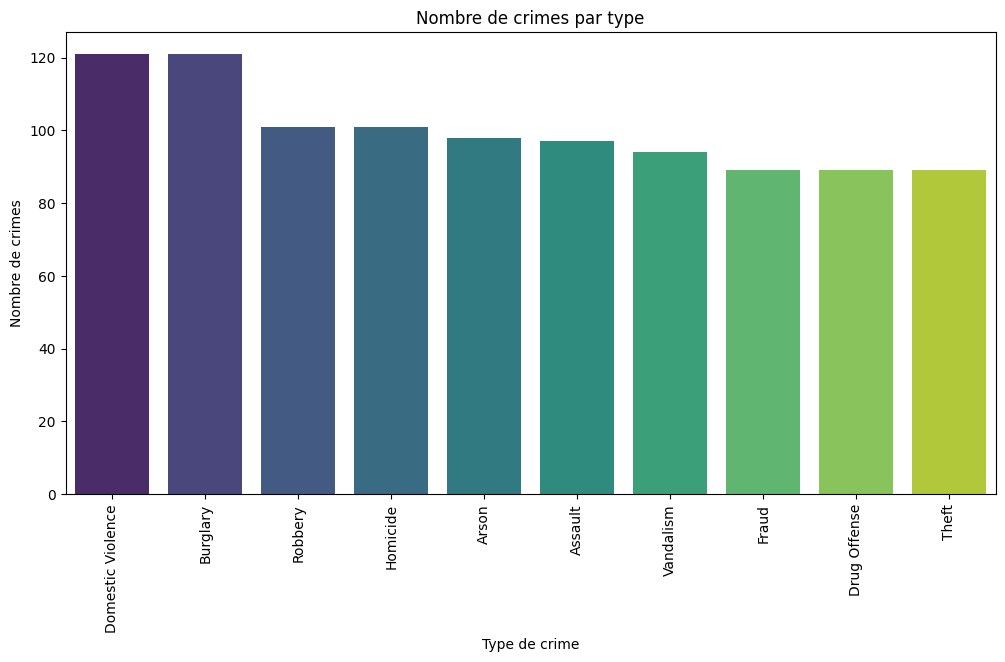

In [20]:
df['crime_type'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="crime_type", order=df["crime_type"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par type")
plt.xlabel("Type de crime")
plt.ylabel("Nombre de crimes")
plt.show()

Ce graphique nous laisse supposer que les types de crimes les plus fréquents sont les crimes à domicile (violence domestique), tandis que les moins fréquents sont les vols (theft).

Passons maintenant à l’étude des villes où les crimes ont eu lieu, en examinant les différents types de crime.



/tmp/ipython-input-148147333.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




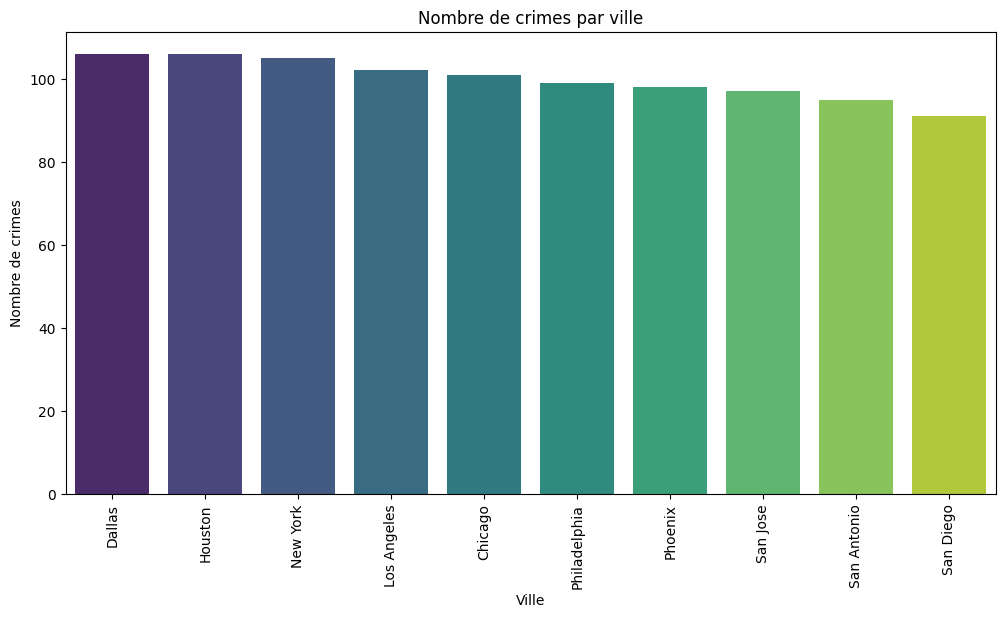

In [61]:
import plotly.express as px
distribution_crime_type_city = df[['crime_type','city']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="city", order=df["city"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par ville")
plt.xlabel("Ville")
plt.ylabel("Nombre de crimes")
plt.show()

Nous pouvons supposer, à partir de ce graphique, que les villes où les différents types de crimes sont les plus fréquents sont Dallas et Houston. À partir de New York, ces crimes diminuent progressivement jusqu’à atteindre un niveau plus faible à San Diego.

Passons maintenant à l’analyse des États où les crimes ont été commis, selon leur type.

/tmp/ipython-input-2009936561.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Nombre de crimes par état')

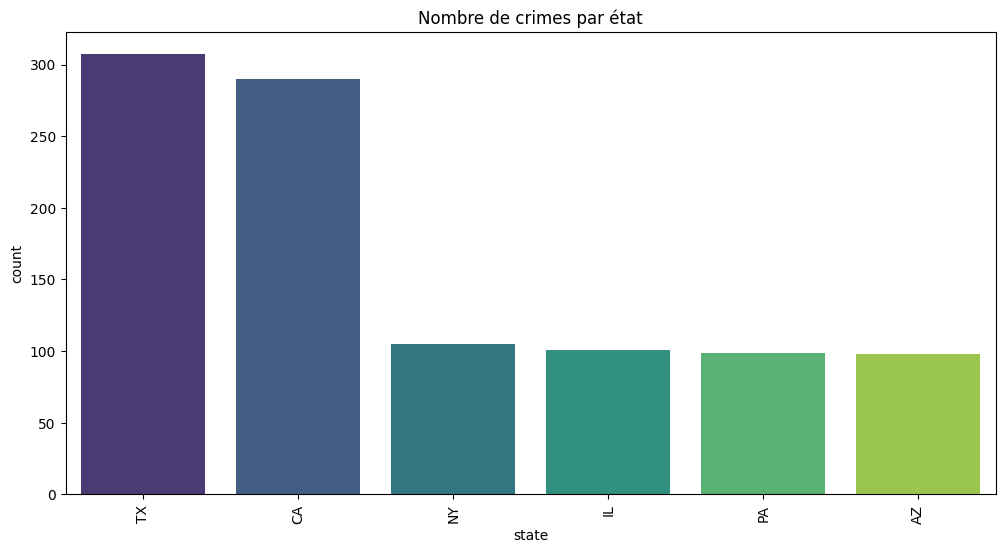

In [34]:
df[[ 'crime_type','state']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="state", order=df["state"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par état")

Nous pouvons supposer, à partir de ce graphique, que les États où le ces différents types de crimes est le plus élevé sont le Texas (TX) et la Californie (CA). À l’inverse, les États où l'on observe le moins de ces crimes sont New York (NY), l’Illinois (IL), la Pennsylvanie (PA) et l’Arizona (AZ).


passons au nombre de crime par détail du lieu,top(10) de la location_description

In [36]:
df[['crime_type', 'location_description']].value_counts().head(10)
fig=px.bar(df[['crime_type', 'location_description']].value_counts().head(10).reset_index(),
           x='location_description',
           y='count',
           color='crime_type',
           title='"Nombre de crimes par détail du lieu')
fig.show()


Nous remarquons que la localité où les différents types de crimes sont les plus fréquents est le 9233 Main St, tandis que les autres localités — à partir de 464 Oak St — présentent un niveau de ces différents types de criminalité moins élevé.





*   **Identifier le type de crime dans un quartier donné à une date et heure précises**



In [40]:
crime_counts_by_date_type = df[['crime_type', 'date']].value_counts().head(10).reset_index()
fig = px.pie(crime_counts_by_date_type,
             values='count',
             names='date',
             color='crime_type',
             title='typs de crimes par date ')
fig.show()

Nous remarquons que:

 les mêmes types de crimes se font à chaque date




 Jettons un coup d'œil sur les horaires

In [44]:
df[['crime_type','time']].value_counts().head(10)
fig=px.bar(df[['crime_type','time']].value_counts().head(10).reset_index(),
           x='time',
           y='count',
           color='crime_type',
           title='type de crimes par heure')
fig.show()

Nous pouvons supposer que
les mêmes types de crimes se font à chaque heure

* **Identifions le genre , Groupe racial ou ethnique et Âge de la victime au moment de l’incident**

In [49]:
crime_counts_by_gender = df[['crime_type', 'victim_age']].value_counts().head(10).reset_index()
fig = px.pie(crime_counts_by_gender,
             values='count',
             names='victim_age',
             color='crime_type',
             title='Type de crimes par genre')
fig.show()

Nous remarquons que les différents types de crimes affectent principalement 29,49 % des personnes âgées de 40 ans, suivies de 11,8 % des personnes âgées de 44 ans, tandis que les autres tranches d’âge sont touchées à parts égales (9,8 %).

/tmp/ipython-input-3685819276.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




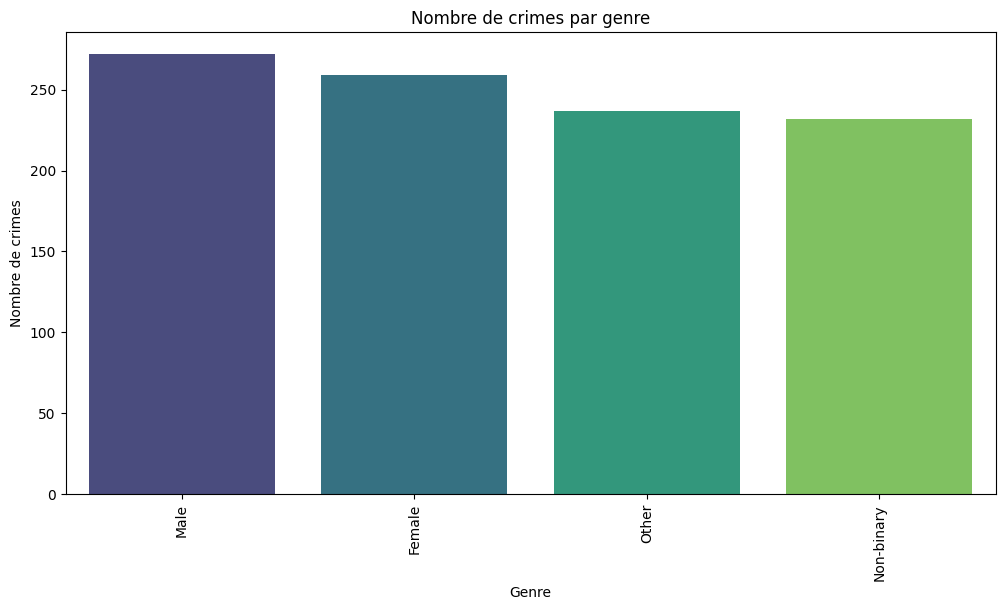

In [59]:
df[['crime_type','victim_gender']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="victim_gender", order=df["victim_gender"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de crimes")
plt.show()

Nous remarquons que les différents types de crimes touchent principalement les garçons, suivis des femmes. Le taux diminue ensuite progressivement pour les personnes de genre autres et inconnu, bien que ce niveau reste relativement élevé.

/tmp/ipython-input-1771092360.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




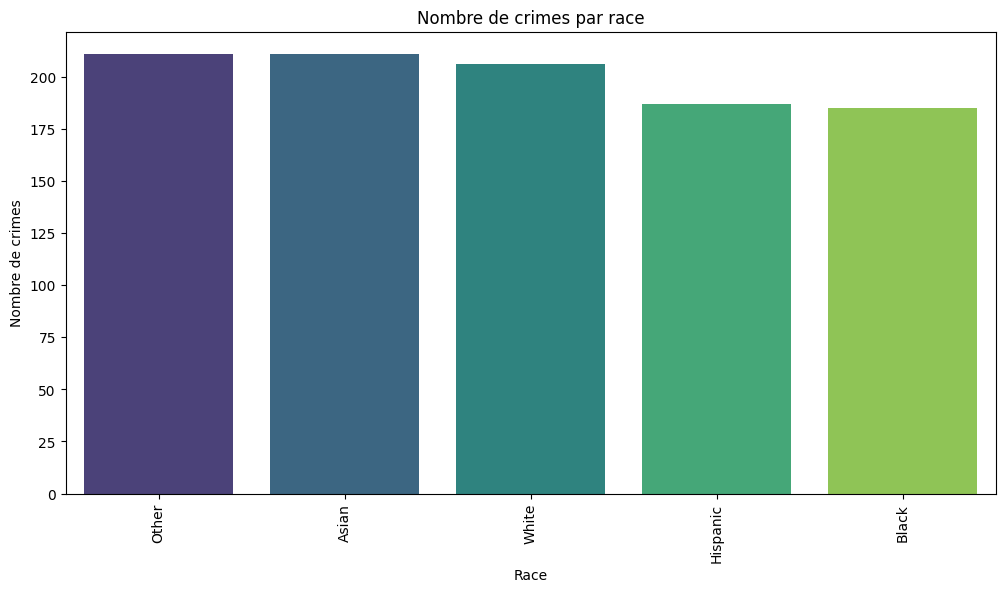

In [60]:
df[['crime_type','victim_race']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="victim_race", order=df["victim_race"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par race")
plt.xlabel("Race")
plt.ylabel("Nombre de crimes")
plt.show()

Nous remarquons que ces différents types de crimes touchent principalement les personnes des groupes “Other” et “Asian”. En comparaison, les autres groupes raciaux — notamment White, Hispanic et Black — sont moins concernés.


# Résumé des Observations:

1. Types de Crimes Fréquents :

Les crimes à domicile (violence domestique) sont les plus fréquents, tandis que les vols sont moins courants.

2. Villes Impactées :

 Dallas et Houston présentent les taux les plus élevés de crimes, avec une diminution progressive vers New York et San Diego.

3. États Affectés :

 Le Texas et la Californie affichent les taux les plus élevés de criminalité, tandis que New York, l’Illinois, la Pennsylvanie et l’Arizona sont parmi les moins touchés.

4. Localités :

 La rue 9233 Main St est la plus touchée par différents types de crimes, contrairement à d'autres localités comme 464 Oak St.

5. Temporalité des Crimes :

 Les mêmes types de crimes se produisent régulièrement à chaque date et heure.

6. Démographie :

 Les personnes âgées de 40 ans sont les plus touchées (29,49 %), suivies par celles de 44 ans (11,8 %), tandis que les autres tranches d’âge sont affectées de manière égale (9,8 %).

7. Genre :

 Les garçons sont les plus touchés, suivis des femmes, avec un taux plus faible pour les personnes de genre autre ou inconnu.

8. Origine Ethnique :

 Les groupes “Other” et “Asian” sont les plus concernés par la criminalité, tandis que les groupes White, Hispanic et Black sont moins touchés.

#Suggestions pour Améliorer la Sécurité Publique:

* Alertes Ciblées : Développer un système d'alerte qui informe en temps réel les citoyens des types de crimes fréquents dans leur région, en utilisant des données démographiques et géographiques.

* Renforcement de la Police de Proximité :

 Augmenter la présence policière dans les quartiers les plus touchés, notamment à Dallas, Houston et dans des localités spécifiques comme 9233 Main St.

* Éducation et Sensibilisation :

 Lancer des campagnes de sensibilisation sur la violence domestique et d'autres crimes, en ciblant spécifiquement les groupes d'âge et de genre les plus touchés.

* Collaboration Communautaire :

 Impliquer les communautés locales dans des initiatives de sécurité, favorisant des liens entre les citoyens et la police pour une meilleure communication.

* Analyse des Données :

 Utiliser des analyses de données pour identifier les tendances criminelles et ajuster les stratégies de sécurité publique en conséquence.

* Programmes de Prévention :

 Mettre en place des programmes de prévention ciblant les jeunes et les groupes vulnérables, afin de réduire la criminalité à la source.

**A BIENTÔT 💛**